# Fine-Tuning Your Model

## 1. How good is your model ?

Pada Supervised learning jenis Klasifikasi, kita menggunakn metriks evaluasi **akurasi** untuk mengukur peforma model. Namun pada kenyataannya Akurasi dalam keadaan tertentu kurang dapat diandalkan, yaitu pada saat kelas target tidak proporsional (terdapat kelas yang sangat mendominasi) yang dikenal **Imbalance Class**. 

Contoh : Pada kasus Pemodelan Klasifikasi fraud detection dimana dilakukan klasifikasi fraud dan tidak fraud transactions yang menghasilkan 99% transaki tidak fraud (legitimate) dan hanya 1% fraud. Jika pada data legitimate dilakukan pemodelan kita dapat dengan mudah membuat pemodelan dengan akurasi 99%. namun ini akan menjadi sangat buruk untuk memprediksi transaksi fraud sehingga gagal mencapai tujuan utamanya. hal tersebut disebabkan karena model yang tidak proporsional. Untuk itu memerlukan cara berbeda dalam evaluasi model

### 1.1 Confusion Matrix for Assesing Classfication Performance

Salah satu evaluasi model alternatif pada data imbalance adala dengan menggunakan confusion matrix, yaitu sebuah matriks untuk klasifikasi biner dengan ukuran 2X2 yang merangkum kinerja model.

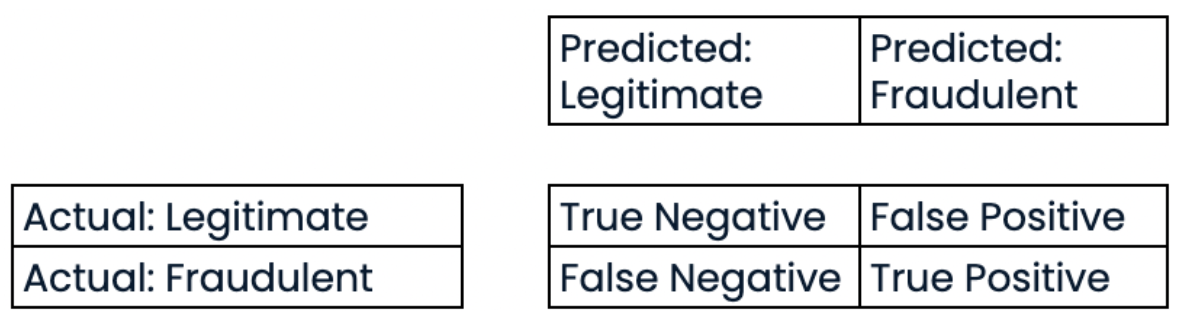


- TP = total fraud yang diprediksi benar oleh model
- TN = total legitimate diprediksi benar oleh model
- FN = total legitimate diprediksi salah oleh model
- FP = total fraud yang diprediksi salah oleh model


> - Biasanya kelas yang diperhatikan adalah **True** Class yang mengacu pada prediksi yang benar atau klasifikasi yang benar
> - Dalam kasus ini karena tujuannya mendeteksi fraud, maka kelas positifnya adalah fraud.
    - kelas positif biasanya merupakan kelas yang memiliki makna tertentu atau kelas yang Anda ingin lebih fokus dalam analisis. Penentuan kelas positif dapat berbeda tergantung pada kasus atau konteks masalah.



#### Kenapa Confusion Matrix Penting ?

1. Dapat diperoleh **akurasi**, yaitu jumlah prediksi benar dibagi total matiks
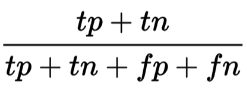

2. Dapat diperoleh **presisi**, total TP dibagi dengan semua prediksi positive (TP+FP)
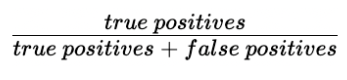
    - presisi yang tinggi menunjukan rate FP yang lebih rendah
    - high presisi = semakin sedikit transaksi yang legitimate diklasifikasikan sebagai penipuan

3. Dapat diperoleh **recall/sensitivity**, total TP dibagi (TP+FN)
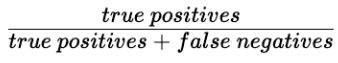
    - high recall = lower FN rate
    - high recall = prediksi sebagian besar transaksi penipuan adalah benar
    
4. Dapat diperoleh **F1 Score**, rerata harmonik presisi and Recall
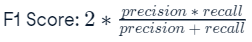

#### Confusion Matrix in Scikit Learn

In [55]:
import pandas as pd

In [56]:
churn_df = pd.read_csv('dataset/telecom_churn_clean.csv')
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [57]:
from sklearn.model_selection import train_test_split

X = churn_df.drop('churn', axis = 1).values
y = churn_df['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [59]:
print(confusion_matrix(y_test, y_pred))

[[1133    5]
 [ 185   11]]


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1138
           1       0.69      0.06      0.10       196

    accuracy                           0.86      1334
   macro avg       0.77      0.53      0.51      1334
weighted avg       0.83      0.86      0.80      1334



### Exercise

**1. Deciding on a primary metric**

As you have seen, several metrics can be useful to evaluate the performance of classification models, including accuracy, precision, recall, and F1-score.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.

ans : A model predicting if a customer is a high-value lead for a sales team with limited capacity.

> With limited capacity, the sales team needs the model to return the highest proportion of true positives compared to all predicted positives, thus minimizing wasted effort.

**2. Assessing a diabetes prediction classifier**

In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

diabetes_df has been preloaded for you as a pandas DataFrame and split into X_train, X_test, y_train, and y_test. In addition, a KNeighborsClassifier() has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

- Import confusion_matrix and classification_report.
- Fit the model to the training data.
- Predict the labels of the test set, storing the results as y_pred.
- Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.

In [61]:
diabetes_df = pd.read_csv('dataset/diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the target variable
y = diabetes_df["diabetes"].values
X = diabetes_df[["bmi", "age"]].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.28, # bobotnya 70:30
                                                   random_state= 42, # set seed
                                                   stratify= y) # memastikan bahwa pembagian data mengikuti proporsi kelas dalam y

In [63]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[123  18]
 [ 54  21]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       141
           1       0.54      0.28      0.37        75

    accuracy                           0.67       216
   macro avg       0.62      0.58      0.57       216
weighted avg       0.64      0.67      0.63       216



> Excellent! The model produced 21 true positives and 18 false positives, meaning precision was more than 50%, which is confirmed in the classification report. The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

## 2. Logistic Regression and ROC Curve

Dalam kenyataanya Regresi tidak hanya mampu untuk memprediksi dataset yang memiliki variable target numerik, namun juga mampu memprediksi data untuk variable target kategorik (Klasifikasi biner khususnya). Regresi tersebut adalah Regresi logistik yang digunakan untuk masalah klasifikasi. Hasil dari regresi logistik berupa probalitas atau peluang dari salah satu pada 2 kelas di dalam target yang ada.
- jika probabilitas lebih dari p > 0.5, data diberikan label = 1 (kelas positif)
- jika probabilitas kurang dari p < 0.5, data diberikan label = 0 (kelas negatif)

<br>

Regresi logistik nantinya akan menghasilkan batas keputusan linear 
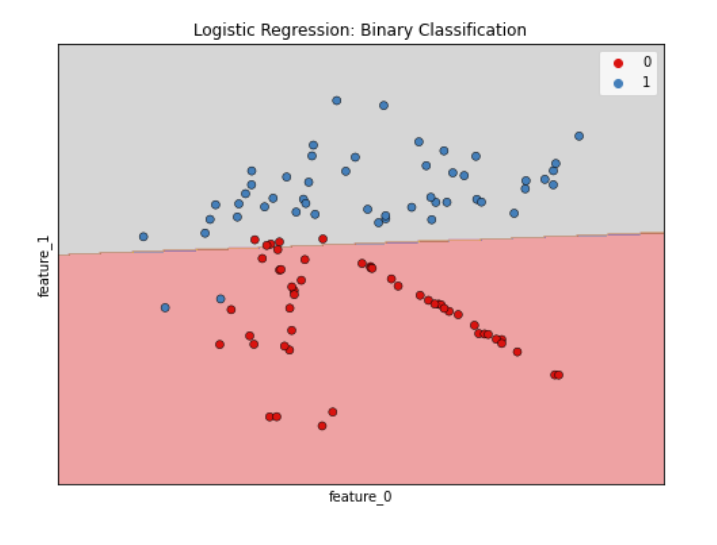

#### 2.1 Logistic Regression in Scikit Learn

In [64]:
# inisiasi data awal
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [65]:
# import model dari scikit learn
from sklearn.linear_model import LogisticRegression

# membuat instance classifier 
logreg = LogisticRegression()

# melakukan train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, # bobotnya 70:30
                                                   random_state= 42) # set seed)
# melakukan fitting model
logreg.fit(X_train, y_train)

# memprediksi data test
y_pred = logreg.predict(X_test)

In [66]:
# melakukan prediksi probabilitas 
y_pred_probs = logreg.predict_proba(X_test)[:,1]

In [67]:
print(y_pred_probs[0])

0.18826020038112695


**insight:**
- probabilitas model dalam memprediksi 18%

#### 2.2 Probability Treshold

Ambang batas (threshold) dalam regresi logistik adalah nilai yang digunakan untuk memutuskan kelas hasil prediksi. Secara default treshold = 0.5. Dalam konteks regresi logistik, model menghasilkan probabilitas bahwa suatu observasi termasuk dalam kelas 1 (kelas positif). Ambang batas digunakan untuk mengonversi probabilitas ini menjadi prediksi kelas yang konkret. Pemilihan ambang batas adalah keputusan kritis karena dapat mempengaruhi hasil dari model regresi logistik, terutama dalam hal evaluasi kinerja dan pengambilan keputusan.

Threshold adalah nilai yang memengaruhi kinerja model klasifikasi dan digunakan dalam pembuatan prediksi kelas. Kurva ROC membantu memahami kinerja model pada berbagai nilai ambang batas, memungkinkan pengguna untuk mengukur sensitivitas, spesifisitas, dan memilih threshold yang sesuai dengan tujuan analisis dan preferensi pribadi. 
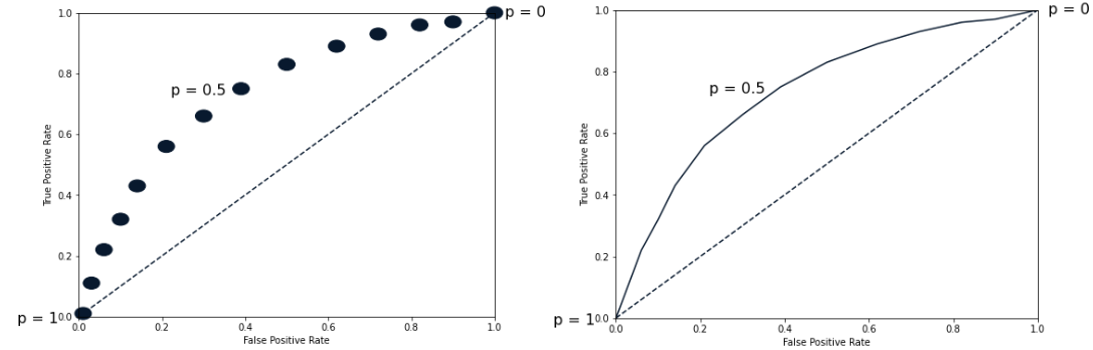

Gambar diatas adalah Kurva ROC yaitu grafik yang menggambarkan perubahan sensitivitas (True Positive Rate) terhadap 1-specificity (False Positive Rate) seiring dengan variasi ambang batas. Setiap titik pada kurva ROC sesungguhnya mewakili kinerja model pada satu nilai threshold tertentu. Saat ambang batas berubah, sensitivitas dan spesifisitas model juga berubah, dan Anda dapat memplot titik-titik ini pada kurva ROC.

- Pada gambar, garis putus-putus mewakili peluang/probabilitas
    - koordinat (0,0) berarti model tersebut tidak dapat membedakan dengan benar antara kelas positif dan kelas negatif. Ini berarti model tersebut akan membuat prediksi yang sangat buruk dan tidak lebih baik daripada pengambilan keputusan acak.
    - koordinat (1,1) berarti model tersebut memiliki tingkat sensitivitas (true positive rate) yang sama dengan 1 dan tingkat spesifisitas (true negative rate) yang juga sama dengan 1. Artinya, model ini mampu mengidentifikasi semua instance dari kelas positif dengan benar (tidak ada false negatives), dan juga mampu mengidentifikasi semua instance dari kelas negatif dengan benar (tidak ada false positives).

- Namun, semakin dekat titik pada kurva ROC ke (1,1), semakin baik kinerja modelnya. Semakin jauh dari (0,0) dan semakin mendekati (1,1), semakin baik model dalam membedakan antara kelas positif dan kelas negatif.







#### 2.3 Plotting Curve in Scikit Learn

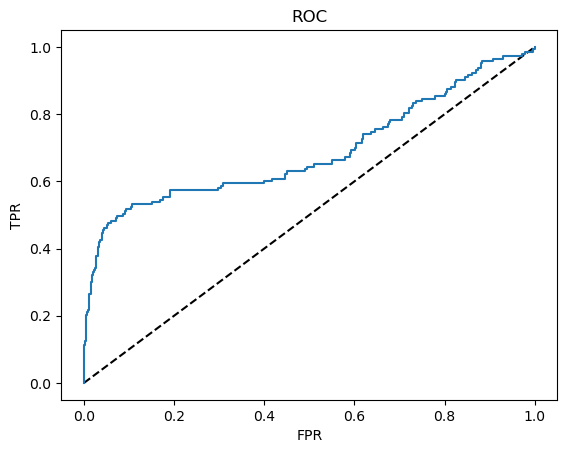

In [68]:
import matplotlib.pyplot as plt

# plotting rov curve
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

Area di bawah kurva ROC (AUC-ROC) adalah metrik penting yang digunakan untuk mengukur kualitas keseluruhan model klasifikasi. AUC-ROC menggabungkan kinerja model pada semua nilai ambang batas, sehingga mengukur sejauh mana model mampu memisahkan kelas positif dan negatif di seluruh spektrum ambang batas. Semakin tinggi nilai AUC-ROC, semakin baik kinerja model tersebut.

In [69]:
# Menghitung AUC

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_probs))

0.6870364174914934


**insight :**
- AUC=0,68 menunjukkan kinerja model klasifikasi yang lebih baik daripada menebak acak, tetapi juga menunjukkan bahwa masih ada ruang untuk perbaikan, tergantung pada tujuan dan persyaratan aplikasi. Evaluasi lebih lanjut dan perbaikan model mungkin diperlukan jika hasil ini tidak memenuhi standar yang diinginkan.

### Exercise 

**1. Building a logistic regression model**

In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The diabetes_df dataset has been split into X_train, X_test, y_train, and y_test, and preloaded for you.

- Import LogisticRegression.
- Instantiate a logistic regression model, logreg.
- Fit the model to the training data.
- Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.

In [70]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
X = diabetes_df.drop('diabetes', axis= 1).values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, # bobotnya 70:30
                                                   random_state= 42) # set seed)

In [72]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.26551025 0.18336597 0.12119632 0.1561354  0.49611225 0.4458221
 0.01359243 0.61646106 0.55640536 0.79311816]


C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> Nicely done! Notice how the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79. Now let's plot the ROC curve to visualize performance using different thresholds.

**2. The ROC curve**

Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, y_test, and the predicted probabilities of the test features belonging to the positive class, y_pred_probs, have been preloaded for you, along with matplotlib.pyplot as plt.

You will create a ROC curve and then interpret the results.

- Import roc_curve.
- Calculate the ROC curve values, using y_test and y_pred_probs, and unpacking the results into fpr, tpr, and thresholds.
- Plot true positive rate against false positive rate.

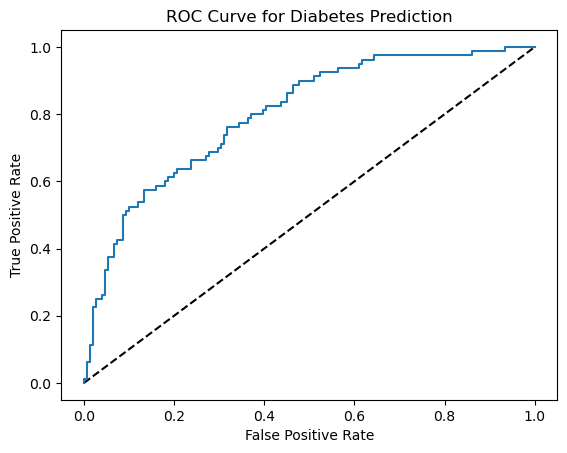

In [73]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

**Question**

Well done on producing the ROC curve for the diabetes prediction model.

But, what does the plot tell you about the model's performance?

Possible answers : the model is much better than randomly guessing the class each obeservation

> Well done! The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

**3. ROC AUC**

The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

The confusion_matrix and classification_report functions have been preloaded for you, along with the logreg model you previously built, plus X_train, X_test, y_train, y_test. Also, the model's predicted test set labels are stored as y_pred, and probabilities of test set observations belonging to the positive class stored as y_pred_probs.

A knn model has also been created and the performance metrics printed in the console, so you can compare the roc_auc_score, confusion_matrix, and classification_report between the two models.

- Import roc_auc_score.
- Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
- Calculate and print the confusion matrix.
- Call classification_report().

In [74]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8002483443708608
[[121  30]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



> Did you notice that logistic regression performs better than the KNN model across all the metrics you calculated? A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.

## 2. Hyperparameter Tunning

Setelah mengetahui cara mengevaluasi model, kita juga perlu mengetahui cara mengoptimalkan model melalui Hyperparameter tunning. Hyperparameter adalah parameter yang tidak dipelajari oleh model dalam proses pelatihan (training), tetapi mengatur juga bagaimana model diperbarui selama pelatihan dan bagaimana model akan berperilaku. kemudian hyperparameter ini akan di tunning yaitu proses mencari kombinasi parameter model yang optimal.

Beberapa Contoh Hyperparameter Tunning,
- pada saat melakukan regresi ridge/lasso kita harus memilih alpha
- pada saat KNN memilih n_neighbors
hyperparameter merupakan parameter yang kita tentukan sebelum pelatihan model seperti alpha dan n_neighbors diatas sehingga hyperparamater menjadi langkah mendasar untuk membangun model yang sukses adalah memilih hyperparameter yang sesuai

#### 2.1 Tahapan Hyperparameter Tuning

langkah-langkah memilih hyperparameter yang benar
- mencoba banyak nilai parameter, lihat seberapa baik hasilnya pilih yang terbaik (hyperparameter tunning)
- saat menggunakan hyperparamter yang berbeda, gunakan Cross validation untuk menghindari overfitting ke data test
- kita dapat membagi data dan melakukan CV pada data train
- data test digunakan untuk evalusasi model final

**Tuning Hyperparameter:** 
Ada beberapa metode yang dapat digunakan untuk menemukan kombinasi hyperparameter optimal:
- Grid Search: Metode ini mencoba semua kombinasi hyperparameter dalam ruang yang telah ditentukan. Ini adalah pendekatan eksaustif yang dapat memakan waktu, tetapi dapat menemukan kombinasi terbaik jika ruang hyperparameter kecil.
- Random Search: Metode ini memilih kombinasi hyperparameter secara acak dari ruang yang telah ditentukan. Ini lebih efisien daripada grid search dan sering memberikan hasil yang baik.
- Optimasi Bayesian: Metode ini menggunakan teknik optimasi bayesian untuk memilih kombinasi hyperparameter. Ini sering menghasilkan hasil yang baik dengan jumlah percobaan yang lebih sedikit daripada grid search atau random search.

#### 2.2 Grid Search CV
salah satu tuning hyperparameter yaitu dengan **Grid Search CV**
-  misal kita mencari dua hyperparameter untuk alpha model KNN jenis metrik dan jumlag tetangga yang berbeda
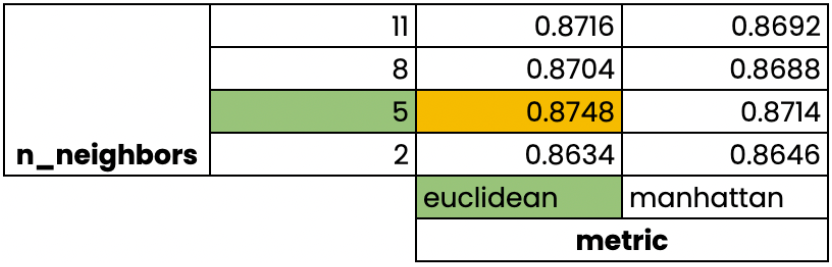

##### GridSearch CV in Scikit Learn

In [75]:
sales_df = pd.read_csv('dataset/advertising_and_sales_clean.csv')
sales_df = sales_df.drop('influencer', axis = 1)
sales_df.head()

,tv,radio,social_media,sales
0,16000.0,6566.23,2907.98,54732.76
1,13000.0,9237.76,2409.57,46677.90
2,41000.0,15886.45,2913.41,150177.83
3,83000.0,30020.03,6922.30,298246.34
4,15000.0,8437.41,1406.00,56594.18


In [76]:
# Create X and y arrays
X = sales_df.drop('sales', axis = 1 ).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# menggunakan grid search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.linear_model import Ridge

kf = KFold(n_splits=5, shuffle= True, random_state=42)

param_grid = {'alpha' : np.arange(0.0001, 1, 10),
             'solver' : ['sag','lsqr']}

ridge = Ridge()

ridge_cv = GridSearchCV(ridge, param_grid, cv = kf)

ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'sag'} 0.9989758439180809


Namun pada GridSearch CV memiliki kekurangan utama yaitu memakan waktu, karena model akan melakukan banyak pelatihan 
- 10-fold CV, 3 Hyperparameter, 30 Nilai = memerlukan 900 pelatihan model

untuk itu ada cara lain yang lebih ringan digunakan dan menghasilkan hasil yang juga optimal

#### 2.3 RandomizedSeacrh CV

In [77]:
# menggunakan grid search CV
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5, shuffle= True, random_state=42)

param_grid = {'alpha' : np.arange(0.0001, 1, 10),
             'solver' : ['sag','lsqr']}

ridge = Ridge()

ridge_cv = RandomizedSearchCV(ridge, param_grid, cv = kf, n_iter=2)

ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} 0.9989757908476138


In [78]:
test_score = ridge_cv.score( X_test, y_test)
print(test_score)

0.9990152104759406


### Exercise

**1. Hyperparameter tuning with GridSearchCV** 

Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

X_train, X_test, y_train, and y_test have been preloaded for you. A KFold() object has been created and stored for you as kf, along with a lasso regression model as lasso.

- Import GridSearchCV.
- Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.
- Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf.
- Fit the grid search object to the training data to perform a cross-validated grid search.

In [87]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
X = diabetes_df.drop('diabetes', axis= 1).values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, # bobotnya 70:30
                                                   random_state= 42) # set seed)

In [90]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.29604708033272703


> Well done! Unfortunately, the best model only has an R-squared score of 0.296, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

**2. Hyperparameter tuning with RandomizedSearchCV**

As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "diabetes". A logistic regression model has been created and stored as logreg, as well as a KFold variable stored as kf.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.

- Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.
- Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.
- Fit logreg_cv to the training data.
- Print the model's best parameters and accuracy score.

In [91]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.4898469387755102, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.5408163265306123}
Tuned Logistic Regression Best Accuracy Score: 0.7634129456559363


> Great searching! Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! So far we have worked with clean datasets; however, in the next chapter, we will discuss the steps required to transform messy data before building supervised learning models.